# **Fleury's Algorithm**

Description


Fleury's algorithm is a straightforward method to find an Eulerian tour in a graph. It starts from a vertex and builds the tour step-by-step, ensuring that bridges (edges whose removal would disconnect the graph) are only crossed when absolutely necessary.


Implementation Steps

Check if the graph is Eulerian (all vertices have even degrees and the graph is connected).

Start from any vertex with a non-zero degree.

For each edge, check if it is a bridge. If it is, avoid it unless no alternative exists.

Remove the edge from the graph and repeat until all edges are traversed.



Fleury's algorithm is intuitive and easy to follow, making it ideal for understanding the principles of Eulerian tours. The focus on avoiding bridges minimizes the risk of prematurely disconnecting the graph, ensuring a complete traversal.



Example

Graph: A rectangle (4 vertices, 4 edges forming a closed loop).

Start at any vertex (e.g., A).

Follow an edge to an adjacent vertex (e.g., A → B).

Continue to another vertex (e.g., B → C, C → D).

Complete the traversal by returning to the starting vertex (e.g., D → A).

The traversal forms the Eulerian tour: A → B → C → D → A.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
# checking if an edge is valid for the Eulerian circuit
def is_valid_next_edge(graph, u, v):
    if len(graph[u]) == 1:  # if its the only one edge left, it must be valid
        return True

    # counting how many reachable nodes (vertices) there are before removing the edge
    visited = set()
    dfs(graph, u, visited)
    count_before = len(visited)

    # temporarily removing the edge
    graph[u].remove(v)
    graph[v].remove(u)

    # count how many reachable nodes there are left after removing the edge
    visited = set()
    dfs(graph, u, visited)
    count_after = len(visited)

    # restoring the edge
    graph[u].append(v)
    graph[v].append(u)

    # the edge is valid if removing it does not break connectivity
    return count_before == count_after


In [3]:
# performing a depth-first search (DFS) to count reachable nodes
def dfs(graph, node, visited):
    visited.add(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)


In [4]:
# creating Eulerian circuit using Fleury's Algorithm
def fleury_algorithm(graph, start):
    circuit = []
    current = start
    while any(graph.values()):  # while there are edges still left in the graph
        for neighbor in graph[current]:
            if is_valid_next_edge(graph, current, neighbor):
                circuit.append((current, neighbor))  # adding edge to circuit
                graph[current].remove(neighbor)  # removing edge from the graph
                graph[neighbor].remove(current)
                current = neighbor  # moving to the next vertex
                break
    return circuit


In [5]:
# visualizing the graph and the Eulerian circuit
def visualize_graph(edges, circuit):
    G = nx.Graph()  # creating an undirected graph for edges
    G.add_edges_from(edges)

    circuit_graph = nx.Graph()  # creating a graph for the circuit
    circuit_graph.add_edges_from(circuit)

    pos = nx.spring_layout(G)  # computing the positions of the nodes for visualization
    plt.figure(figsize=(4, 3))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700)
    nx.draw_networkx_edges(circuit_graph, pos, edgelist=circuit, edge_color='red', width=2, arrows=True)
    plt.title("Eulerian Circuit (Fleury's)")
    plt.show()


Eulerian Circuit: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 1), (1, 3), (3, 5), (5, 0), (0, 2), (2, 4), (4, 0)]


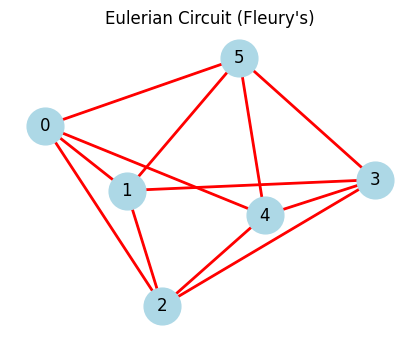

In [6]:
# defining the graph and compute Eulerian circuit
if __name__ == "__main__":
    # defining the edges of the graph
    edges = [
        (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0),
        (0, 2), (2, 4), (4, 0), (1, 3), (3, 5), (5, 1)
    ]

    # building the graph as an adjacency list
    graph = defaultdict(list)
    for u, v in edges:
        graph[u].append(v)
        graph[v].append(u)

    # ensuring all vertices have even degrees by adding edges if necessary
    odd_vertices = [v for v in graph if len(graph[v]) % 2 != 0]
    while len(odd_vertices) > 1:
        u = odd_vertices.pop()
        v = odd_vertices.pop()
        graph[u].append(v)
        graph[v].append(u)

    # Eulerian circuit using Fleury's algorithm
    eulerian_circuit = fleury_algorithm(graph, start=0)
    print("Eulerian Circuit:", eulerian_circuit)

    # visualizing the graph and the Eulerian circuit
    visualize_graph(edges, eulerian_circuit)


# **Depth-First Search (DFS) Approach**

Description

The DFS approach is a recursive or stack-based method that traverses the graph while constructing the Eulerian tour. It ensures all edges are visited exactly once and is particularly efficient when implemented correctly.

Implementation Steps

Check if the graph is Eulerian (all vertices have even degrees and the graph is connected).

Start from any vertex with a non-zero degree.

Use a recursive DFS to traverse edges.

Remove each edge as it is visited.

Backtrack when no more edges are available from the current vertex.


The DFS method is computationally efficient, especially for dense graphs. It systematically explores paths and naturally handles cycles by backtracking, making it well-suited for programmatic implementation.

Example

Graph: Same as above. (a rectangle)

Start at vertex A.

Recursively traverse edges (e.g., A → B → C → D).

Backtrack to explore remaining edges if needed.

Complete the traversal (e.g., D → A).

Collect the tour in reverse order during backtracking (D → C → B → A).

In [40]:
# DFS-based Eulerian circuit traversal
def find_eulerian_tour(graph, start_node):

    tour = []  # storing the Eulerian tour
    stack = [start_node]
    local_graph = nx.Graph(graph)  # copy the graph for traversal

    while stack:
        current = stack[-1]
        if local_graph.degree[current] > 0:
            # traversing the first available edge
            neighbor = next(iter(local_graph.neighbors(current)))
            stack.append(neighbor)
            local_graph.remove_edge(current, neighbor)
        else:
            # backtracking and record the node in the tour
            tour.append(stack.pop())
    return tour


In [41]:
# creating an Eulerian graph
G = nx.Graph()

# adding edges to form an Eulerian graph
edges = [
    (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0),  # cycle
    (1, 3), (3, 5), (5, 0), (0, 2), (2, 4), (4, 0), (1, 5)  # additional edges
]
G.add_edges_from(edges)


In [42]:
# Eulerian circuit using DFS
start_node = 0  # starting vertex for the Eulerian circuit
dfs_eulerian_tour = find_eulerian_tour(G, start_node)

# creating the edge representation of the circuit
eulerian_circuit = [(dfs_eulerian_tour[i], dfs_eulerian_tour[i + 1]) for i in range(len(dfs_eulerian_tour) - 1)]


Eulerian Circuit: [(0, 4), (4, 5), (5, 3), (3, 4), (4, 2), (2, 3), (3, 1), (1, 5), (5, 0), (0, 2), (2, 1), (1, 0)]


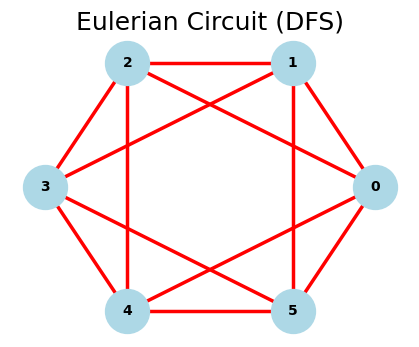

In [43]:
# visualization of the Eulerian circuit
pos = nx.circular_layout(G)  # arranging nodes in a circle for clarity
plt.figure(figsize=(4, 3))

# drawing all edges and nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, edge_color='gray', font_size=10, font_weight='bold')

# highlighting the Eulerian circuit
nx.draw_networkx_edges(
    G, pos, edgelist=eulerian_circuit, edge_color='red', width=2.5
)

print(f"Eulerian Circuit: {eulerian_circuit}")

plt.title("Eulerian Circuit (DFS)", fontsize=18)
plt.show()
